# Part II - (Loan Data Exploration from Prosper)
## by (Ngwe Becky)



## Investigation Overview

In this in this investigation, the following was figured out:
* The factors which can be used to predict default on credit.
* What factors influence Prosper ratings.

## Dataset Overview

This data set contains 113937 loans with 81 variables on each loan, for the purpose of this investigation I've taken the following variables: Term, LoanStatus, BorrowerRate, ProsperRating (Alpha), ListingCategory (numeric), EmploymentStatus, DelinquenciesLast7Years, StatedMonthlyIncome, TotalProsperLoans, LoanOriginalAmount, LoanOriginationDate, Recommendations, Investors.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('prosperLoanData.csv')

In [3]:
base_color = sns.color_palette()[0]

## Data Wrangling

In [4]:
target_columns = [
       'Term','LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'ProsperRating (Alpha)', 'ProsperScore','TotalProsperLoans', 'ListingCategory (numeric)', 
'BorrowerState', 'EmploymentStatus', 'StatedMonthlyIncome', 'LoanOriginalAmount','LoanOriginationDate', 'Recommendations', 'Investors'
]
target_df = df[target_columns]
target_df = target_df.dropna(subset=['ProsperRating (Alpha)']).reset_index()
target_df['LoanOriginationDate'] = pd.to_datetime(target_df['LoanOriginationDate'])
target_df['TotalProsperLoans'] = target_df['TotalProsperLoans'].fillna(0)

## BorrowerAPR and BorrowerRate
**Observation 1**
* There is a slight difference between borrowerAPR and borrower rate
* There is a large spike between 0.3 to 0.4 this implies most of the borrowerAPR and borrower rate is approximately 0.3 percent

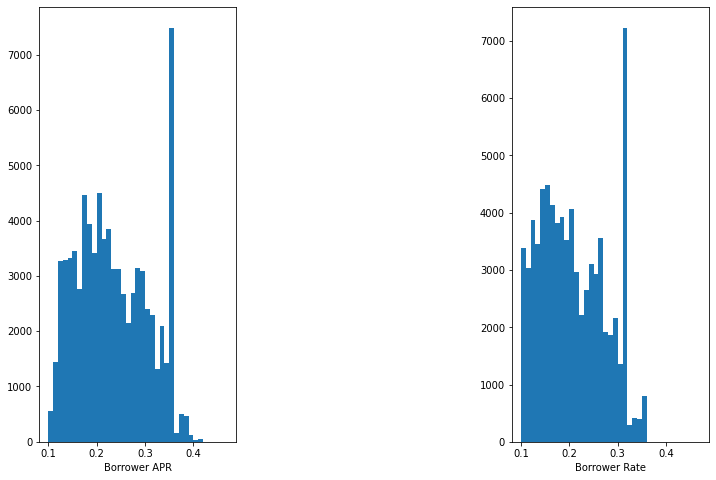

In [5]:
bins = np.arange(0.1, target_df.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[12, 8])
plt.subplot(1,3,1)
plt.hist(data = target_df, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');

plt.subplot(1,3,3)
plt.hist(data = target_df, x = 'BorrowerRate', bins = bins);
plt.xlabel('Borrower Rate');

## Loan Original Amount
**Observation 2**
* The very large spikes in frequency are at 10k, 15k, 20k, 25k and 35k. It means that most of the loans are multiples of 1k.

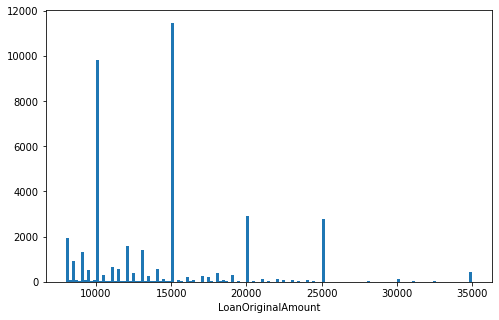

In [6]:
bins = np.arange(8000, target_df.LoanOriginalAmount.max()+200, 200)
plt.figure(figsize=[8, 5])
plt.hist(data = target_df, x = 'LoanOriginalAmount' , bins = bins);
plt.xlabel('LoanOriginalAmount');

## Stated Monthly Income
**Observation 4:**
* The distribution of stated monthly income is severely right screwed.
* Most of the stated monthly income is less than 30K 

(array([3.8370e+03, 1.8651e+04, 2.3278e+04, 1.6672e+04, 1.0107e+04,
        5.1650e+03, 2.4910e+03, 1.7180e+03, 9.2000e+02, 6.6600e+02,
        2.8600e+02, 3.3500e+02, 1.0000e+02, 1.0000e+02, 1.4300e+02,
        5.7000e+01, 6.0000e+01, 3.7000e+01, 2.3000e+01, 5.1000e+01,
        1.4000e+01, 2.1000e+01, 1.2000e+01, 2.1000e+01, 7.0000e+00,
        3.0000e+00, 8.0000e+00, 3.0000e+00, 6.0000e+00, 3.0000e+00,
        4.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00, 1.0000e+00,
        7.0000e+00, 1.0000e+00, 8.0000e+00, 2.0000e+00, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

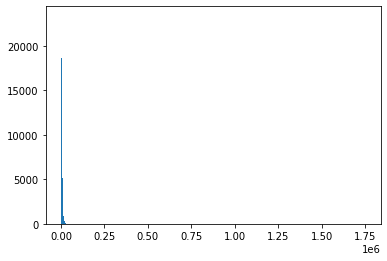

In [7]:
plt.hist(data=target_df, x='StatedMonthlyIncome', bins=1000)

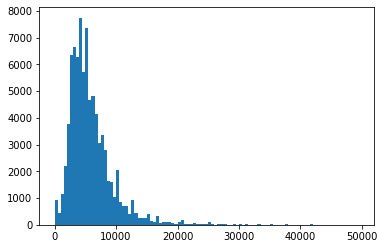

In [8]:
# Distribution of stated monthly income
bins_smi = np.arange(0, 50000, 500)
plt.hist(data = target_df, x = 'StatedMonthlyIncome', bins=bins_smi);
#plt.xlim(0, boundary);

In [9]:
# adjusting the form of data
condition = (target_df['LoanStatus'] == 'Completed') | (target_df['LoanStatus'] == 'Defaulted') |\
                  (target_df['LoanStatus'] == 'Chargedoff')
target_df = target_df[condition]

def change_to_defaulted(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
target_df['LoanStatus'] = target_df.apply(change_to_defaulted, axis=1)
target_df['LoanStatus'].value_counts()

Completed    19664
Defaulted     6341
Name: LoanStatus, dtype: int64

**After transforming dataset we have 19664 completed loans and 6341 defaulted.**

In [ ]:
categories = {1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}
def reduce_categorie(row):
    loan_category = row['ListingCategory (numeric)']
    if loan_category in categories:
        return categories[loan_category]
    else:
        return categories[7]

target_df['ListingCategory (numeric)'] = target_df.apply(reduce_categorie, axis=1)
target_df['ListingCategory (numeric)'].value_counts()

## Status and Prosper Rating:
**Observation 1:**
* The `most frequency` rating is among employed workers and the least frequency is among part-time workers.
* And the `most frequent` rating among employed workers is `D` and second highest is `B` and son on.

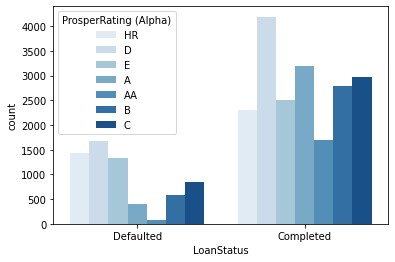

In [9]:
sns.countplot(data=target_df, x='EmploymentStatus', hue='ProsperRating (Alpha)', palette='Blues')
plt.xticks(rotation= 90)

### Borrower state and Prosper rating
Observation 2:
* The `debt consolidation` have `most frequency among all of them.` with its highest frequency being at `CA`
* The highest listing category being focused at CA.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 [Text(0, 0, 'FL'),
  Text(1, 0, 'IL'),
  Text(2, 0, 'NY'),
  Text(3, 0, 'CO'),
  Text(4, 0, 'CA'),
  Text(5, 0, 'KS'),
  Text(6, 0, 'VA'),
  Text(7, 0, 'GA'),
  Text(8, 0, 'MN'),
  Text(9, 0, 'MD'),
  Text(10, 0, 'WI'),
  Text(11, 0, 'OH'),
  Text(12, 0, 'PA'),
  Text(13, 0, 'AL'),
  Text(14, 0, 'TX'),
  Text(15, 0, 'KY'),
  Text(16, 0, 'OK'),
  Text(17, 0, 'OR'),
  Text(18, 0, 'WA'),
  Text(19, 0, 'MI'),
  Text(20, 0, 'MO'),
  Text(21, 0, 'NC'),
  Text(22, 0, 'NJ'),
  Text(23, 0, 'TN'),
  Text(24, 0, 'NM'),
  Text(25, 0, 'CT'),
  Text(26, 0, 'ID'),
  Text(27, 0, 'AZ'),
  Text(28, 0, 'WV'),
  Text(29, 0, 'NV'),
  Text(30, 0, 'AR'),
  Text(31, 0, 'SC'),
  Text(32, 0, 'NH'),
  Text(33, 0, 'IN'),
  Text(34, 0, 'LA'),
  Text(35, 0, 'NE'),
  Text(36, 0, 'AK'),
  Text(37, 0, '

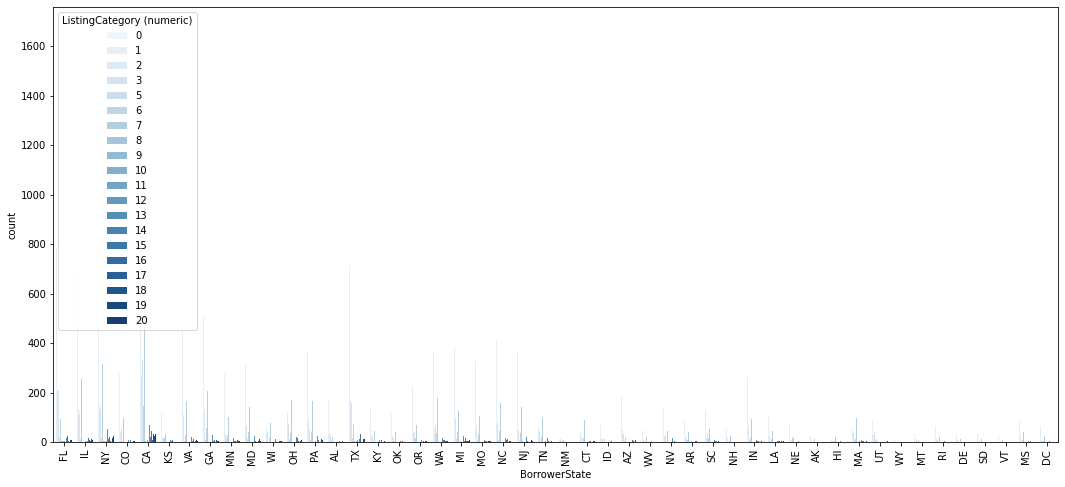

In [10]:
plt.figure(figsize=[18, 8])
sns.countplot(data=target_df, x='BorrowerState', hue = 'ListingCategory (numeric)', palette='Blues');
plt.xticks(rotation = 90)

## Loan Status and Loan Amount
**Observation 3:**
* As from Above Graph we can state that `defaulted credits` tend to be `smaller` than `completed credits` onces. 

<AxesSubplot:xlabel='LoanStatus', ylabel='LoanOriginalAmount'>

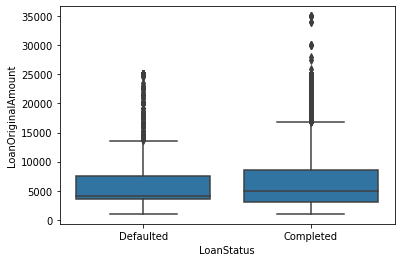

In [11]:
base_color = sns.color_palette()[0]
sns.boxplot(data=target_df, x='LoanStatus', y='LoanOriginalAmount', color= base_color);

## Relationship between Employment Status and Prosper Rating
Observation 4:
* Lower ratings seem to have greater proportions of individuals with employment status Not Employed, Self-Employed, Retired and Part-Time.
* The highest Prosper ratings being focused at `D`

<AxesSubplot:xlabel='ProsperRating (Alpha)', ylabel='count'>

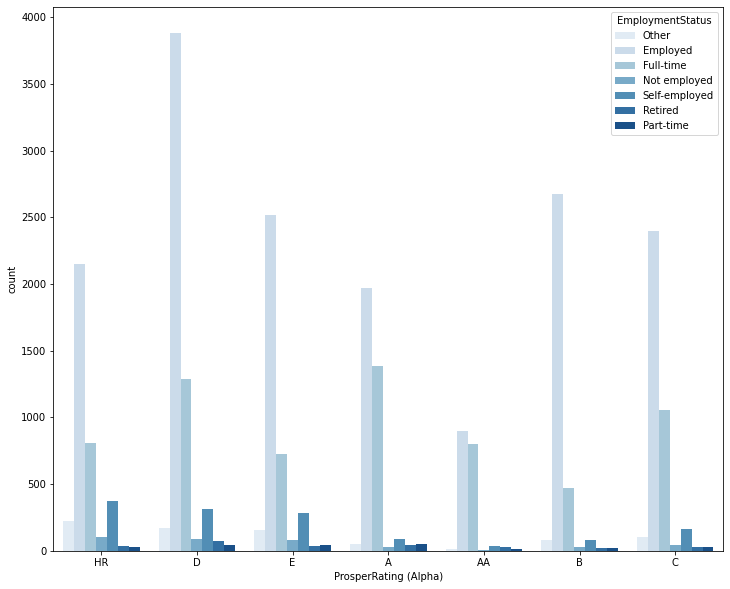

In [12]:
plt.figure(figsize=[12, 8])
sns.countplot(data=target_df, x = 'ProsperRating (Alpha)', hue = 'EmploymentStatus', palette='Blues');

## Borrower APR vs. Prosper Rating
Observation 1:
* Borrower APR decreases with an increase in Prosper ratings.
* Borrowers with the least APR has the best Prosper ratings.

In [13]:
loan_sub = target_df[target_columns]
# data wrangling, remove loans with missing borrower APR information
loan_sub = loan_sub[~loan_sub.BorrowerAPR.isna()]
# data wrangling, remove loans with stated monthly income greater than 30k, which are outliers
loan_sub = loan_sub[loan_sub.StatedMonthlyIncome<=30000]
# Convert ProsperRating and Employment status into ordered categorical types
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
loan_sub['ProsperRating (Alpha)'] = loan_sub['ProsperRating (Alpha)'].astype(ordered_var)

emp_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = emp_order)
loan_sub['EmploymentStatus'] = loan_sub['EmploymentStatus'].astype(ordered_var)
loan_sub.shape

(25936, 14)

Text(0.5, 1.0, 'Borrower APR vs Prosper Rating')

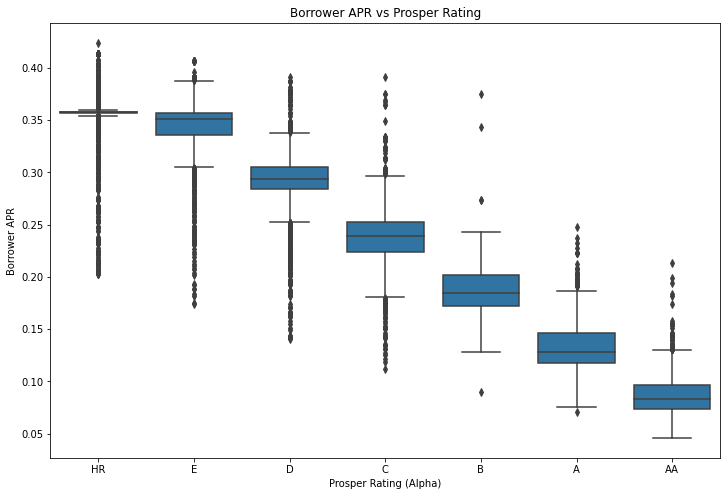

In [14]:
plt.figure(figsize=[12, 8])
base_color= sns.color_palette()[0]
sns.boxplot(data= loan_sub, x= 'ProsperRating (Alpha)', y= 'BorrowerAPR', color= base_color)

plt.ylabel('Borrower APR')
plt.xlabel('Prosper Rating (Alpha)')
plt.title('Borrower APR vs Prosper Rating')

## Effect of ProsperRating and Terms on StatedMonthlyIncome and LoanOriginalAmount

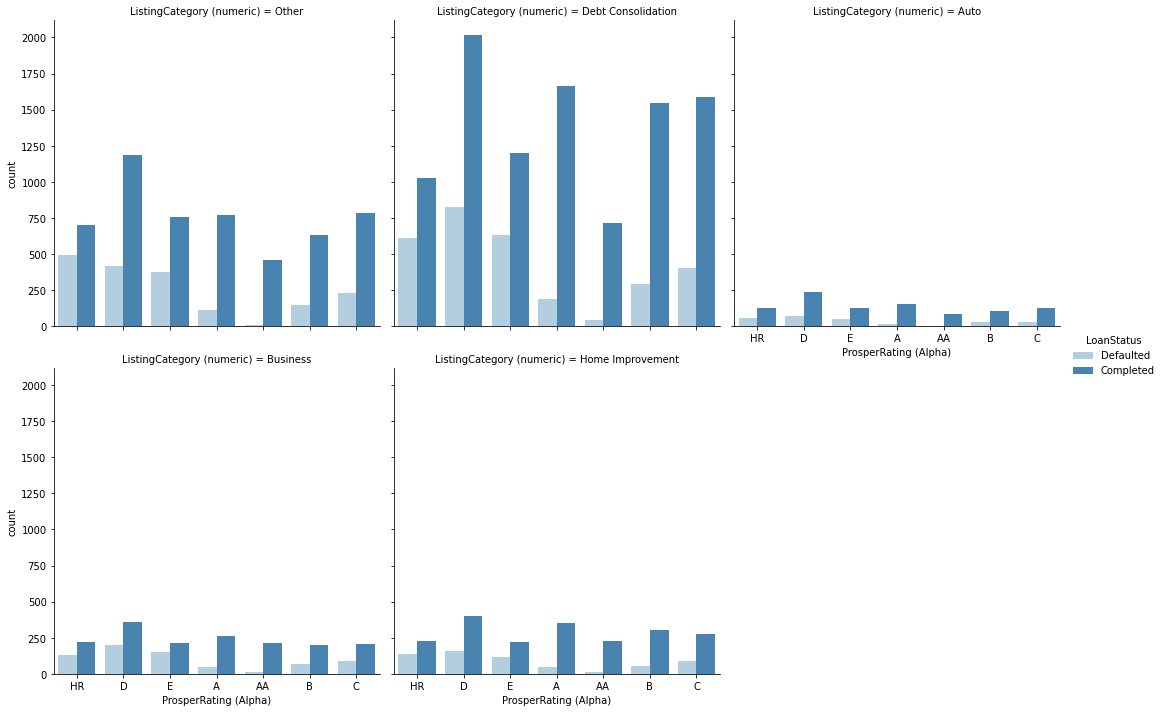

In [15]:
fig, ax = plt.subplots(ncols=2, figsize=[12,6])
sns.pointplot(data = loan_sub, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax[0])
sns.pointplot(data = loan_sub, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1]);

## Borrower APR by Rating and Term
Observation 3:
*  The borrower APR fluctuates with an increase in borrow term for people with HR-C raings.
* The APR increase with the increase of borrow term for people with B-AA ratings.

Text(0.5, 1.0, 'Borrower APR by Rating and Term')

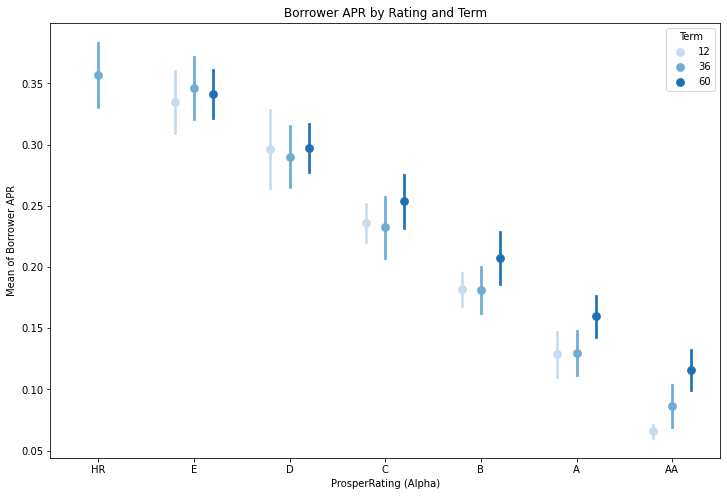

In [16]:
plt.figure(figsize=[12, 8])
sns.pointplot(data= loan_sub, x= 'ProsperRating (Alpha)', y= 'BorrowerAPR', palette= 'Blues', hue = 'Term',
     linestyles= '', dodge= 0.4, ci='sd')
plt.xlabel('ProsperRating (Alpha)')
plt.ylabel('Mean of Borrower APR')
plt.title('Borrower APR by Rating and Term')